# Text-guided image-to-image generation

The [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) lets you pass a text prompt and an initial image to condition the generation of new images.

Before you begin, make sure you have all the necessary libraries installed:

In [ ]:
# uncomment to install the necessary libraries in Colab
!pip install diffusers transformers ftfy accelerate 

Get started by creating a [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) with a pretrained Stable Diffusion model like [`nitrosocke/Ghibli-Diffusion`](https://huggingface.co/nitrosocke/Ghibli-Diffusion).

In [18]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float32)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Download and preprocess an initial image so you can pass it to the pipeline:

In [9]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cpu/torch_stable.html


Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html


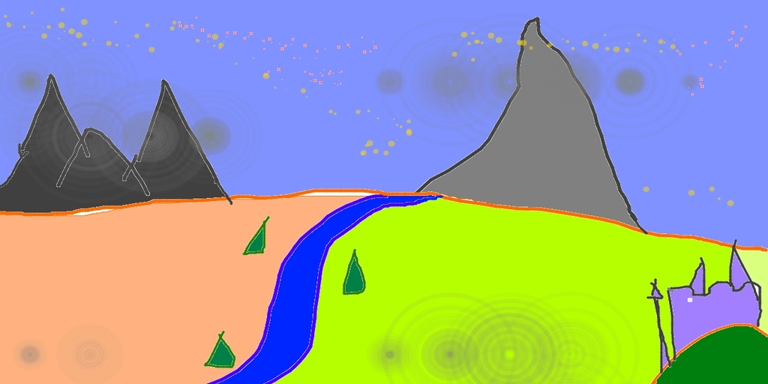

In [19]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))
init_image

  0%|          | 0/37 [00:00<?, ?it/s]

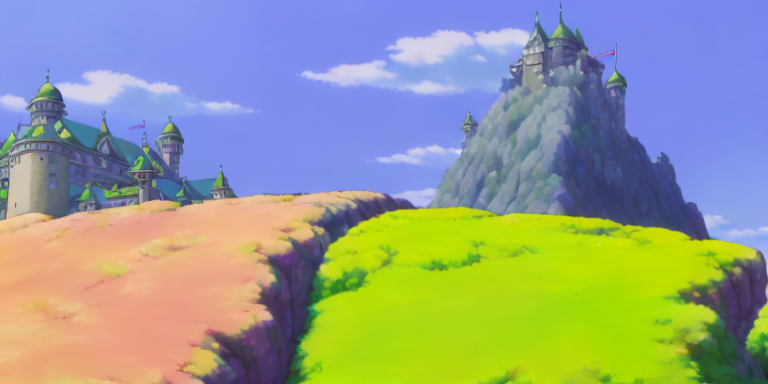

In [20]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline


import torch
from PIL import Image
import requests
from io import BytesIO
import numpy as np

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float32)

# Resmi indirme
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))

# Resmi bir PyTorch tensorine dönüştürme
init_tensor = torch.tensor(np.array(init_image)).permute(2, 0, 1).float()  # RGB kanalları, yükseklik ve genişlik boyutlarını yeniden düzenler

# Eğer gerekiyorsa, tensori normalleştirme (0 ile 1 arasında değerler)
init_tensor /= 255.0

#model = model.float()  # modeli float32 veri türüne dönüştürün (eğer model adı 'model' ise)
init_tensor = init_tensor.float()



In [21]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    length = len(value)
    return tuple(
        int(value[i:i + length // 3], 16) for i in range(0, length, length // 3)
    )

# HEX kodunu RGB'ye dönüştürme
hex_color = "#ff5733"  # Örnek bir HEX kodu
rgb_color = hex_to_rgb(hex_color)

# RGB değerlerini bir tensor'e dönüştürme
color_tensor = torch.tensor([[rgb_color]], dtype=torch.float32) / 255.0  # Renk değerlerini normalize etme

# Eğer model renk tensor'ini kabul ediyorsa, pipe fonksiyonunu çağırırken bu tensor'u iletebilirsiniz.
# Ancak, bu modelin renk tensor'ini nasıl kabul edeceğini bilmediğimizden, bu sadece bir örnektir.


In [23]:
prompt = "ghibli style, a fantasy landscape with castles, color: #ff5733"
generator = torch.Generator().manual_seed(1024)
image = pipe(prompt=prompt, image=init_tensor, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
v

  0%|          | 0/37 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ghibli-castles.png"/>
</div>

You can also try experimenting with a different scheduler to see how that affects the output:

In [ ]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/lms-ghibli.png"/>
</div>

Check out the Spaces below, and try generating images with different values for `strength`. You'll notice that using lower values for `strength` produces images that are more similar to the original image.

Feel free to also switch the scheduler to the [LMSDiscreteScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/lms_discrete#diffusers.LMSDiscreteScheduler) and see how that affects the output.

<iframe
	src="https://stevhliu-ghibli-img2img.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>

In [ ]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")

In [24]:
import cv2
import numpy as np
from PIL import Image

# Renk bilgisini RGB'ye dönüştürün
hex_color = "#ff5733"
rgb_color = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))

# Başlangıç resmini okuyun
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content))
init_np = np.array(init_image)

# Renk çerçevesi oluşturun
height, width, _ = init_np.shape
frame_thickness = 10
color_frame = cv2.rectangle(init_np.copy(), (0, 0), (width, height), rgb_color, frame_thickness)

# Renk çerçevesini başlangıç resmi ile birleştirin
merged_image = cv2.addWeighted(color_frame, 0.5, init_np, 0.5, 0)

# Sonucu kaydedin veya gösterin
output_image = Image.fromarray(merged_image)
output_image.save('output_image.png')


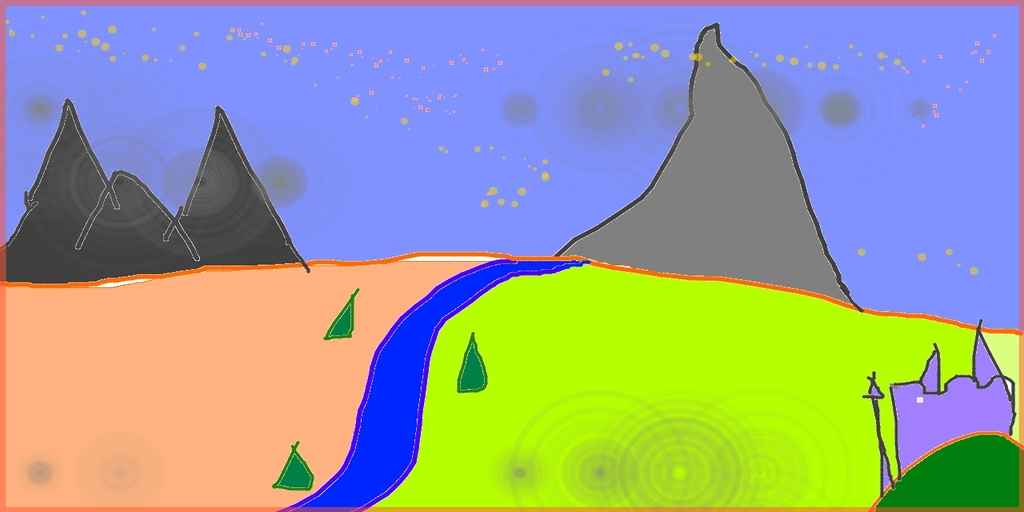

In [25]:
output_image

In [26]:
import numpy as np
from PIL import Image

# Renk bilgisini RGB'ye dönüştür
hex_color = "#ff5733"
rgb_color = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))

# Başlangıç resmini oku
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content))
init_np = np.array(init_image)

# Tek renkli bir arka plan görüntüsü oluştur
background = np.full_like(init_np, rgb_color, dtype=np.uint8)

# Arka planı başlangıç resmi ile birleştir
merged = np.where(init_np == 0, background, init_np)

# Sonucu kaydet veya göster
output_image = Image.fromarray(merged)
output_image.save('output_image.png')


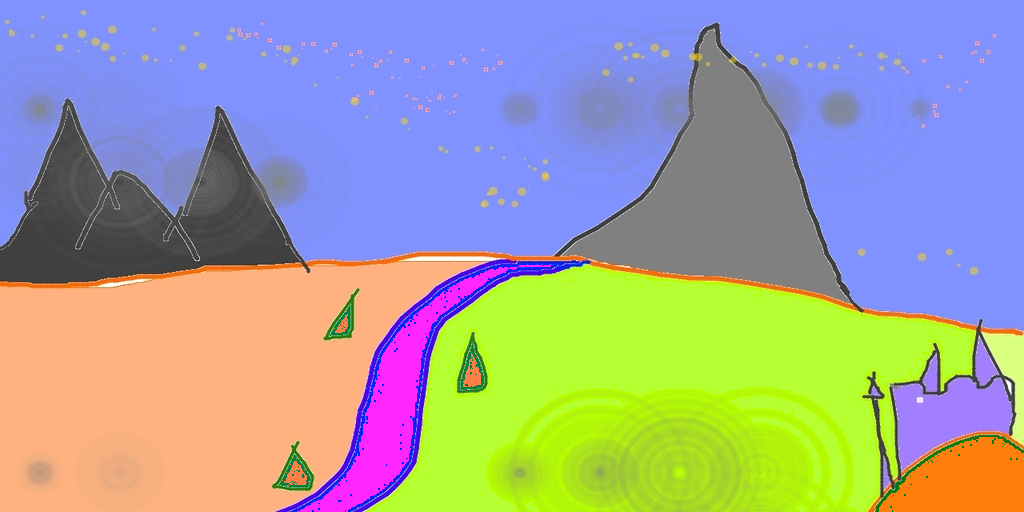

In [27]:
output_image

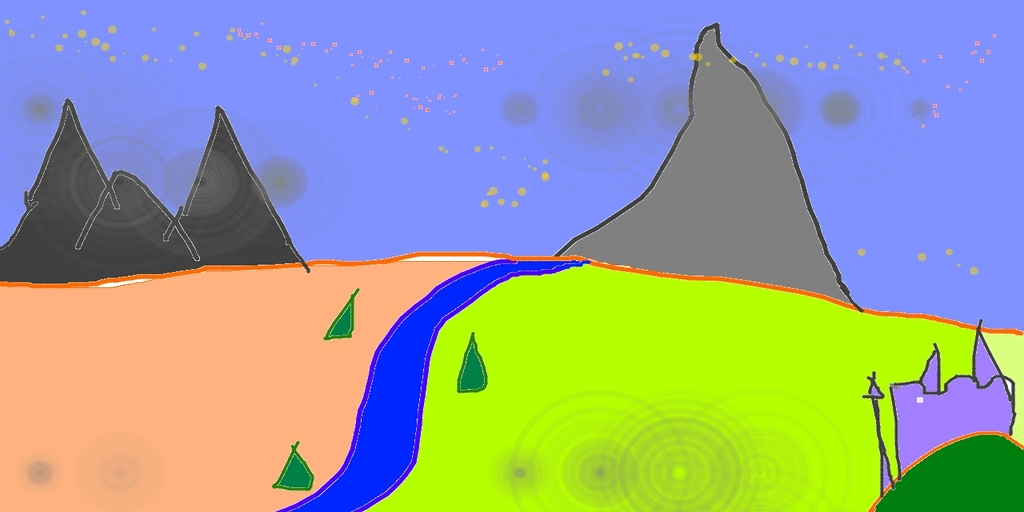

In [28]:
init_image

In [29]:
from PIL import Image, ImageDraw, ImageFont
logo = Image.open("/content/pepsi.png")
task1_image = output_image  # Task 1'den üretilen görüntü.
color = '#ff5733'
punchline = "Fırsatları Kaçırmayın, Bugün Keşfedin!"
button_text = "Şimdi Satın Al"


In [45]:
from PIL import Image, ImageDraw, ImageFont

# Giriş Parametrelerini Yükleme
logo = Image.open("/content/pepsi.png")  # Logo'nun yolu
task1_image = init_image  # Task 1'den üretilen görüntünün yolu
color = "#3498db"  # Mavi renk
punchline = "Fırsatları Kacırmayın, Bugün Kesfedin!"
button_text = "Kesfet"

# Canvas boyutlarını belirleme
width, height = 800, 600

# Canvas oluşturma
canvas = Image.new('RGB', (width, height), (255, 255, 255))

# Logo ve görüntüyü yerleştirme
x_logo, y_logo = (width - logo.width) // 2, 10  # Logo'yu ortalar ve üst kısmına yerleştirir
x_image, y_image = (width - task1_image.width) // 2, logo.height + 20  # Görüntüyü logo'nun altına ortalar

canvas.paste(logo, (x_logo, y_logo))
canvas.paste(task1_image, (x_image, y_image))

# Metin ve düğmeyi çizme
draw = ImageDraw.Draw(canvas)
#font = ImageFont.load_default()  # Varsayılan fontu kullanır
font = ImageFont.truetype("/content/arial_narrow.ttf", 500)
#punchline = punchline.replace('ş', 's').replace('ğ', 'g').replace('ı', 'i').replace('ü', 'u').replace('ö', 'o').replace('ç', 'c').replace('â', 'a').replace('î', 'i').replace('û', 'u')

x_text, y_text = 10, y_image + task1_image.height + 10  # Metni görüntünün hemen altına yerleştirir
draw.text((x_text, y_text), punchline, fill=color, font=font)

button_width, button_height = 200, 50
x_button, y_button = (width - button_width) // 2, y_text + 40  # Düğmeyi metnin altına ortalar
draw.rectangle([x_button, y_button, x_button + button_width, y_button + button_height], fill=color)
x_button_text, y_button_text = x_button + 20, y_button + 10
# ...
draw.text((x_button_text, y_button_text), button_text, fill=(255, 255, 255), font=font)
# ...

canvas.save('output.png')

In [36]:
draw

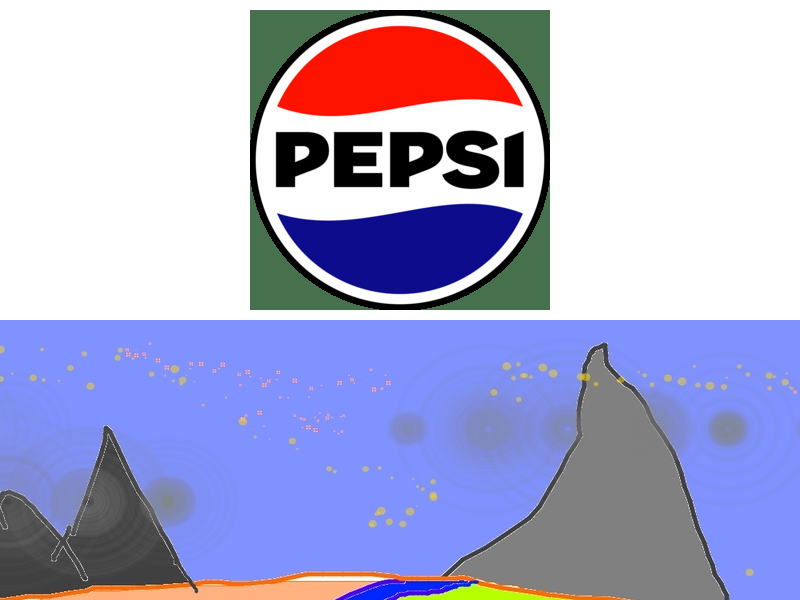

In [43]:
output = Image.open("/content/output.png")
output

In [ ]:
# Define the positions and sizes for the button again

# Determine position for the button
button_width = 100
button_height = 40
button_x = (output_width - button_width) // 2
button_y = text_y + text_height + 10

# Create the advertisement template again

# Create a blank white image
output_image = Image.new("RGB", (output_width, output_height), "white")
draw = ImageDraw.Draw(output_image)

# Place the logo at the top
output_image.paste(logo_image, (logo_x, 0))

# Place the Task 1 image below the logo
output_image.paste(task1_image, ((output_width - task1_image.width) // 2, task1_image_y))

# Draw the punchline
text_width, text_height = draw.textsize(punchline_text_modified, font=font)
text_x = (output_width - text_width) // 2
draw.text((text_x, text_y), punchline_text_modified, font=font, fill=color)

# Draw the button
draw.rectangle([button_x, button_y, button_x + button_width, button_y + button_height], fill=color)
button_text_width, button_text_height = draw.textsize(button_text, font=font)
button_text_x = button_x + (button_width - button_text_width) // 2
button_text_y = button_y + (button_height - button_text_height) // 2
draw.text((button_text_x, button_text_y), button_text, font=font, fill="white")

# Display the final advertisement template
plt.imshow(output_image)
plt.axis('off')
plt.show()


<ipython-input-131-b31e87868446>:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(punchline_text, font=font_large)
<ipython-input-131-b31e87868446>:38: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  button_text_width, button_text_height = draw.textsize(button_text, font=font_small)


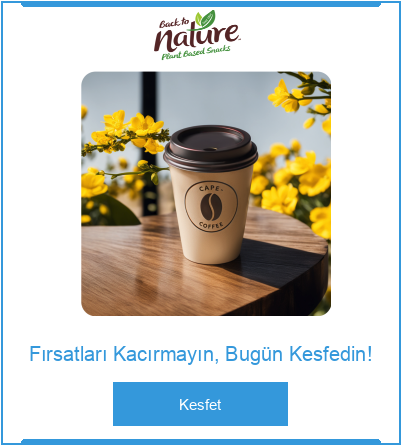

In [131]:
from PIL import ImageDraw, ImageFont

# Load the provided images
generated_image = Image.open("/content/photo2.png")
logo_image = Image.open("/content/logo1.png")

# Parameters for the ad template
punchline_color = "#3498db"
punchline_text = "Fırsatları Kacırmayın, Bugün Kesfedin!"
button_text = "Kesfet"
button_color = "#3498db"

# Load the provided font
font_path = "/content/arial.ttf"
font_large = ImageFont.truetype(font_path, 20)
font_small = ImageFont.truetype(font_path, 15)

# Create the ad template
canvas = Image.new('RGB', (generated_image.width+150, generated_image.height + 200), (255, 255, 255))
draw = ImageDraw.Draw(canvas)

# Place the logo at the top
canvas.paste(logo_image, (int((canvas.width - logo_image.width) / 2), 10))

# Place the generated image below the logo
canvas.paste(generated_image, (80, logo_image.height + 20))

# Draw the punchline
text_width, text_height = draw.textsize(punchline_text, font=font_large)
draw.text(((canvas.width - text_width) / 2, canvas.height - text_height - 80), punchline_text, fill=punchline_color, font=font_large)

# Draw the button
button_width = (text_width + 5)/2
button_height = text_height + 20
button_x = (canvas.width - button_width) / 2
button_y = canvas.height - button_height - 20
draw.rectangle([button_x, button_y, button_x + button_width, button_y + button_height], fill=button_color)
button_text_width, button_text_height = draw.textsize(button_text, font=font_small)
draw.text(((canvas.width - button_text_width) / 2, button_y + (button_height - button_text_height) / 2), button_text, fill="white", font=font_small)
frame_thickness = 1
draw.rectangle([frame_thickness, frame_thickness, canvas.width - frame_thickness, canvas.height - frame_thickness], outline=punchline_color, width=frame_thickness*2)

# Adjust the border sides for the rounded rectangle
border_offset = 20  # Amount to offset the border from the sides
border_thickness = 5
# Define the radius for the rounded corners
corner_radius = 40

# Define the positions for the rounded rectangle
top_left = (frame_thickness + border_offset, frame_thickness)
bottom_right = (canvas.width - frame_thickness - border_offset, frame_thickness + border_thickness)

# Draw the top rounded border line
draw.rounded_rectangle([top_left, bottom_right], fill=punchline_color, radius=corner_radius)

# Adjust the bottom positions for the rounded rectangle
top_left = (frame_thickness + border_offset, canvas.height - frame_thickness - border_thickness)
bottom_right = (canvas.width - frame_thickness - border_offset, canvas.height - frame_thickness)

# Draw the bottom rounded border line
draw.rounded_rectangle([top_left, bottom_right], fill=punchline_color, radius=corner_radius)


canvas
